In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt
from rubiscos import PCC7942
from pltconfig import *

In [2]:
unknown_cat = 'unk'
csome_shell_cat = 'shell'
csome_interior_cat = 'interior'
ci_trans_cat = 'ci_transport'
rubisco_proteostasis_cat = 'rubisco_proteostasis'
rubisco_cat = 'rub'

cat_colors = {
    unknown_cat: 'grey',
    rubisco_cat: greens[-1],
    rubisco_proteostasis_cat: greens[-3],
    ci_trans_cat: oranges[-3],
    csome_interior_cat: purples[-1],
    csome_shell_cat: purples[-1],
}

In [3]:
# Colors for carboxylation and oxygenation
carb_color = cat_colors[rubisco_cat]  # same as rubisco
ox_color = 'grey'

# CO2 and O2 concentrations in uM
# CO2 concentrations range from ~10 uM to 1000 uM. 
# Henry's law at 25 C is ~15 uM for CO2
co2_concs = np.logspace(0.9, 3.1, 200)

# Henry's law at 25 C is ~270 uM for O2
o2_conc = 270

# Calculate rates for the cyanobacterium S. elongatus PCC 7942.
vc_7942, vo_7942 = PCC7942.vs(co2_concs, o2_conc)

# Net rate of carboxylation is carboxylation less 1/2 oxygenation
# (assuming C2 photorespiratory pathway, as in land plants)
net_vc_7942 = vc_7942 - vo_7942/2

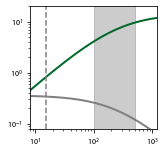

In [4]:
# figure 1b - effect of a CCM. Increasing CO2 kills two birds with one stone. 
fig = plt.figure(figsize=(2.4, 2.25))

plt.xscale('log')
plt.yscale('log')
plt.plot(co2_concs, vc_7942, lw=2, c=carb_color)
plt.plot(co2_concs, vo_7942, lw=2, c=ox_color)

plt.axvline(15, ls='--', lw=1.5, color='grey')
plt.axvspan(100, 500, color='grey', alpha=0.4, zorder=-1)

#plt.xlabel('Aqueous [$CO_2$] ($\mu M$)', fontsize=9)
#plt.ylabel('rubisco rate ($s^{-1}$)', fontsize=9)

plt.xlim(8, 1200)
plt.ylim(0.08, 20)
plt.xticks([10, 100, 1000], fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

plt.savefig('fig1/fig1b.png', dpi=600)
plt.show()

In [5]:
# Data on the genes from H. neapolitanus from Desmarais 2019, Nat. Micro. 
orf_df = pd.read_csv('data/fig1/hnea_two_operons.csv', index_col=0)
orf_df

,cat,short_name,start_pos,end_pos,essential,length,hcr,strand
HNEAP_RS04610,unk,ParA,982347.0,983027.0,nonessential,680.0,False,-
HNEAP_RS04615,rubisco_proteostasis,acRAF,983002.0,983283.0,nonessential,281.0,True,-
HNEAP_RS04635,shell,csos4B,984757.0,985002.0,nonessential,245.0,True,-
HNEAP_RS04605,unk,unk.,982060.0,982351.0,nonessential,291.0,False,-
HNEAP_RS04585,ci_transport,DabA1,973927.0,977067.0,nonessential,3140.0,True,-
HNEAP_RS04575,rubisco_proteostasis,CbbQ,972739.0,973542.0,nonessential,803.0,False,-
HNEAP_RS04580,unk,P-II,973595.0,973930.0,nonessential,335.0,False,-
HNEAP_RS04680,unk,unk.,NaN,NaN,NaN,NaN,NaN,NaN
HNEAP_RS04620,shell,csos1B,983594.0,983926.0,nonessential,332.0,True,-
HNEAP_RS04625,shell,csos1A,984038.0,984334.0,nonessential,296.0,True,-


In [6]:
# default arrow parameters
arrow_width = 0.05
arrow_height = 1e-5
head_scale = 0.2
head_width = 0.085
len_per_bp = 1e-4

def draw_genes(region_boundaries, genes_in_region, ax, y,
               arrow_width=arrow_width, arrow_height=arrow_height, 
               head_scale=head_scale, head_width=head_width,
               len_per_bp=len_per_bp, pad_end=0):
    region_start, region_end = region_boundaries
    for gene_idx in genes_in_region.index:
        gene = genes_in_region.loc[gene_idx]
        gene_length = gene.length

        gene_name = gene.short_name
        gene_cat = gene['cat']

        c = cat_colors.get(gene_cat)
        length = gene_length * len_per_bp
        head_length = length * head_scale
        if length > 0.03:
            head_length = 0.03

        gene_start = gene.start_pos
        gene_end = gene.end_pos
        gene_strand = gene.strand

        if gene_strand == '+':
            start = (gene_start - region_start)*len_per_bp - pad_end*len_per_bp
            genePic = matplotlib.patches.FancyArrow(
                start, y, length, 0,
                width=arrow_width, length_includes_head=True,
                head_width=head_width, head_length=head_length, fill=True, facecolor=c)
            ax.add_artist(genePic)
        else:
            start = (gene_end - region_start) * len_per_bp + pad_end*len_per_bp
            genePic = matplotlib.patches.FancyArrow(
                start, y, -length, 0,
                width=arrow_width, length_includes_head=True,
                head_width=head_width,
                head_length=head_length, fill=True,facecolor=c)
            ax.add_artist(genePic)

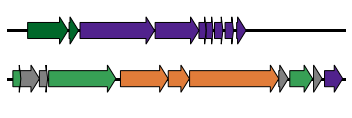

In [7]:
# Operon diagram for the two CCM operons that we cloned into plasmids
fig, ax = plt.subplots(figsize=(5, 1.75))

region1 = (983494, 991379)
region2 = (971579, 983383 + 100)
r1_start, r1_end = region1
r2_start, r2_end = region2
max_plot_len = max(abs(r1_start-r1_end), abs(r2_start-r2_end))*len_per_bp

# Grab all genes who's start and end are within the two regions
genes_in_region1 = orf_df[(orf_df.start_pos >= r1_start) & (orf_df.start_pos <= r1_end) &
                          (orf_df.end_pos >= r1_start) & (orf_df.end_pos <= r1_end)]
genes_in_region2 = orf_df[(orf_df.start_pos >= r2_start) & (orf_df.start_pos <= r2_end) &
                          (orf_df.end_pos >= r2_start) & (orf_df.end_pos <= r2_end)]

# DNA axis behind, then draw the genes as arrows
plt.axhline(0.1, lw=3, c='k', zorder=-1)
plt.axhline(0.25, lw=3, c='k', zorder=-1)
draw_genes(region1, genes_in_region1, ax, y=0.25, pad_end=3400)
draw_genes(region2, genes_in_region2, ax, y=0.1)

plt.xlim(0, max_plot_len)
plt.ylim(0, 0.325)
ax.set_axis_off()

# Flip it around so it's left to right, even though the genes are on the (-) strand. 
ax.invert_xaxis()

plt.tight_layout()

plt.savefig('fig1/fig1c.png', dpi=600)

plt.show()